In [1]:
%load_ext autoreload
%autoreload 1
%aimport twitterClient

In [2]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
file = open('COSC2671-assign1-subsidies.json')
tweets = json.load(file)

In [4]:
tweets_df = pd.DataFrame (tweets['data'], columns = ['id', 'text', 'time', 'hastags', 'mentions', 'language', 'retweet count', 'like_count', 'country','author_id', 'username'])


In [5]:
tweets_df

,id,text,time,hastags,mentions,language,retweet count,like_count,country,author_id,username
0,1582280577352228864,RT @edglasgow59: Your reminder that the only p...,2022-10-18 08:01:01+00:00,None,[edglasgow59],en,3,0,None,580222343,xzllkx
1,1582277675044900864,@Navz0017 @keteralvin @NyakwarSalome If Rao an...,2022-10-18 07:49:29+00:00,None,"[navz0017, keteralvin, nyakwarsalome]",en,0,0,None,1490360464295055361,CiukuEric
2,1582270509332717568,Gov. support via equity investment rather than...,2022-10-18 07:21:01+00:00,None,"[tatacompanies, beisgovuk]",en,0,0,None,1534844332980715520,WeareOverSands
3,1582270240221601792,My petition to ban subsidies for MPs meals was...,2022-10-18 07:19:57+00:00,None,None,en,0,0,{'place_id': '1115004c3fafaf8a'},1223328351273848833,ficrosbie63
4,1582264219537641472,@SanPaulo37 @STVNews Scotland won't be indepen...,2022-10-18 06:56:01+00:00,None,"[sanpaulo37, stvnews]",en,0,0,None,764083678737817600,ItHappensAtTea
...,...,...,...,...,...,...,...,...,...,...,...
1028,1579750994686382080,And…\n\nTruss has form on this\n\nWhen she was...,2022-10-11 08:29:22+00:00,None,None,en,87,452,None,58436094,MarinaPurkiss
1029,1579750381122646017,RT @IkebukuroIce: These people are quite happy...,2022-10-11 08:26:55+00:00,None,[ikebukuroice],en,84,0,None,224644031,jeremypssm
1030,1579750306677927937,Solar Power in UK - does not work without subs...,2022-10-11 08:26:38+00:00,None,None,en,0,1,None,967099429,AndrewJWHaynes
1031,1579748499968913408,@TalkTV @JuliaHB1 Subsidies for MP food and bo...,2022-10-11 08:19:27+00:00,None,"[talktv, juliahb1]",en,1,6,None,1482822780630577156,RScowler


In [6]:
tweets_df.dtypes

id                int64
text             object
time             object
hastags          object
mentions         object
language         object
retweet count     int64
like_count        int64
country          object
author_id        object
username         object
dtype: object

In [7]:
tweets_df['id'] = tweets_df['id'].astype(str)

In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1033 non-null   object
 1   text           1033 non-null   object
 2   time           1033 non-null   object
 3   hastags        154 non-null    object
 4   mentions       883 non-null    object
 5   language       1033 non-null   object
 6   retweet count  1033 non-null   int64 
 7   like_count     1033 non-null   int64 
 8   country        9 non-null      object
 9   author_id      1033 non-null   object
 10  username       1033 non-null   object
dtypes: int64(2), object(9)
memory usage: 88.9+ KB


In [90]:
len(tweets_df)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1033

In [9]:
from datetime import datetime

# for index in range(0, len(tweets_dict_list)):
#     tweets_dict_list[index]['time'] = datetime.datetime.strptime(tweets_dict_list[index]['time'], '%Y-%m-%d %H:%M:%S%z')
date_list = []
for tweet in tweets_df['time']:
    date_list.append(datetime.strptime(tweet, '%Y-%m-%d %H:%M:%S%z'))
#    tweets_df[tweet]['time'] = datetime.strptime(tweet['time'], '%Y-%m-%d %H:%M:%S%z')

In [10]:
tweets_df['time'] = date_list

In [11]:
tweets_df['year'] = tweets_df['time'].apply(lambda x: x.year)
tweets_df['month'] = tweets_df['time'].apply(lambda x: x.month)
tweets_df['day'] = tweets_df['time'].apply(lambda x: x.day)
tweets_df['hour'] = tweets_df['time'].apply(lambda x: x.hour)
hourly_tweets_df = tweets_df[['year','month', 'day', 'hour', 'id']].groupby(['year','month', 'day', 'hour']).count().reset_index()

In [12]:
hourly_tweets_df

,year,month,day,hour,id
0,2022,10,11,8,43
1,2022,10,11,9,16
2,2022,10,11,10,23
3,2022,10,11,11,19
4,2022,10,11,12,13
...,...,...,...,...,...
149,2022,10,18,4,2
150,2022,10,18,5,1
151,2022,10,18,6,8
152,2022,10,18,7,3


In [13]:
hourly_tweets_df['time'] = pd.to_datetime(hourly_tweets_df[['year', 'month', 'day', 'hour']])

In [14]:
hourly_tweets_df

,year,month,day,hour,id,time
0,2022,10,11,8,43,2022-10-11 08:00:00
1,2022,10,11,9,16,2022-10-11 09:00:00
2,2022,10,11,10,23,2022-10-11 10:00:00
3,2022,10,11,11,19,2022-10-11 11:00:00
4,2022,10,11,12,13,2022-10-11 12:00:00
...,...,...,...,...,...,...
149,2022,10,18,4,2,2022-10-18 04:00:00
150,2022,10,18,5,1,2022-10-18 05:00:00
151,2022,10,18,6,8,2022-10-18 06:00:00
152,2022,10,18,7,3,2022-10-18 07:00:00


Text(0, 0.5, 'Count')

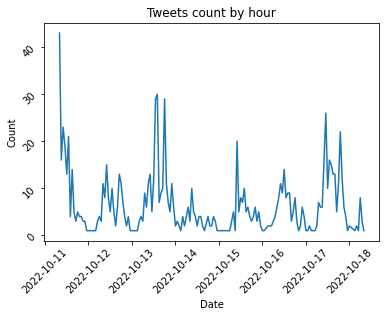

In [15]:

#plt.hist(tweets_df['created_at'], rwidth=0.7, bins = 7)
plt.plot(hourly_tweets_df['time'], hourly_tweets_df['id'])

plt.tick_params(labelrotation=45)
plt.title("Tweets count by hour")
plt.xlabel("Date")
plt.ylabel("Count")


In [16]:
top_users = tweets_df['username'].value_counts().index.tolist()[:10]


In [17]:
top_users_tweets = tweets_df[tweets_df['username'].isin(top_users)]

In [18]:
top_users_tweets = top_users_tweets[['username','id']].groupby(['username']).count().reset_index()

Text(0, 0.5, 'Count')

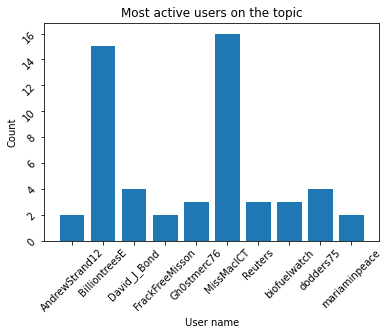

In [19]:
plt.bar(top_users_tweets['username'], top_users_tweets['id'])
plt.tick_params(labelrotation=45)
plt.title("Most active users on the topic")
plt.xlabel("User name")
plt.ylabel("Count")



In [20]:
top_liked_tweets = tweets_df.copy()


In [21]:
top_liked_tweets = top_liked_tweets.sort_values('like_count', ascending=False).head(10)



Text(0, 0.5, 'Count')

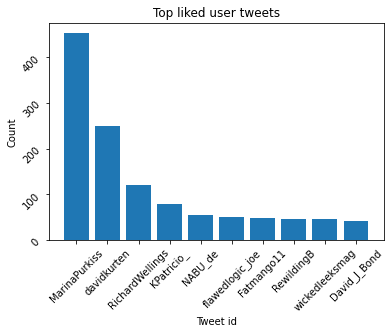

In [22]:
plt.bar(top_liked_tweets['username'], top_liked_tweets['like_count'])
plt.tick_params(labelrotation=45)
plt.title("Top liked user tweets")
plt.xlabel("Tweet id")
plt.ylabel("Count")



In [23]:
from collections import Counter

hashtags = []
hashtags_list_filter = filter(lambda x: (x != None), tweets_df['hastags'])

non_none_hashtags = list(hashtags_list_filter)

for hashtag in non_none_hashtags:
    hashtags.extend(hashtag)
    
hashtagsFreqCounter = Counter()
hashtagsFreqCounter.update(hashtags)

df = pd.DataFrame()
terms = []
counts = []
for term, count in hashtagsFreqCounter.most_common(10):
    terms.append(term)
    counts.append(count)


Text(0, 0.5, 'Count')

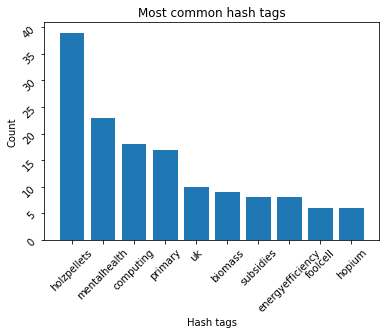

In [24]:
plt.bar(terms, counts)
plt.tick_params(labelrotation=45)
plt.title("Most common hash tags")
plt.xlabel("Hash tags")
plt.ylabel("Count")

In [25]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text

In [26]:
def processTweet(text, tokenizer, stemmer, stopwords):
    
    # coverting to lower case
    text = text.lower()
    text = strip_links(text)
    # tokenising the text
    lTokens = tokenizer.tokenize(text)
    
    lTokens = [token.strip() for token in lTokens]
    # separating into stems
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])


    # removing stopwords, digits, links, hashtags, and @mentions
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit() and not tok.startswith("#") and not tok.startswith("@")]



In [27]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import re,string

tweetTokeniser = nltk.tokenize.TweetTokenizer()

lPunct = list(string.punctuation)

lStopwords = nltk.corpus.stopwords.words('english') + lPunct + [ 'via', '’']

tweetStemmer = nltk.stem.SnowballStemmer("english")

termFreqCounter = Counter()


token_dic = {}
for index, tweet in tweets_df.iterrows():
    
    tweetText = tweet['text']
    
    
    
    
    
     # coverting to lower case
    tweetText = tweetText.lower()
    tweetText = strip_links(tweetText)
    # tokenising the text
    lTokens = tweetTokeniser.tokenize(tweetText)
    
    lTokens = [token.strip() for token in lTokens]
    # separating into stems
    lStemmedTokens = set([tweetStemmer.stem(tok) for tok in lTokens])


    # removing stopwords, digits, links, hashtags, and @mentions


    
    lTokens = [tok for tok in lStemmedTokens if tok not in lStopwords and not tok.isdigit() and tok!= "rt" and not tok.startswith("#") and not tok.startswith("@")]
    
    
    #processTweet(text=tweetText, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)
    
    
    
    
    
    
    
    
    
    token_dic[tweet['id']] = { 'time' : tweet['time'], 'tokens' : lTokens }
    termFreqCounter.update(lTokens)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/melvinmeshach/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
token_dic

{'1582280577352228864': {'time': Timestamp('2022-10-18 08:01:01+0000', tz='UTC'),
  'tokens': ['basic',
   '…',
   'scotland',
   'england',
   'remind',
   'onli',
   'ni',
   'wale',
   'uk',
   'function',
   'ba',
   'financi',
   'part']},
 '1582277675044900864': {'time': Timestamp('2022-10-18 07:49:29+0000', tz='UTC'),
  'tokens': ['ruto',
   'per',
   'think',
   'share',
   '..',
   'realli',
   'fuel',
   "i'm",
   'billion',
   'outsid',
   'month',
   'rao',
   'prone',
   'cancel',
   'uhuru',
   'uk',
   'hand',
   'would',
   'box',
   'friend',
   'wsr',
   'anyway',
   'shaken',
   'make',
   'subsidi',
   'podium']},
 '1582270509332717568': {'time': Timestamp('2022-10-18 07:21:01+0000', tz='UTC'),
  'tokens': ['gov',
   'rather',
   'invest',
   'endless',
   'piggy-bank',
   'strateg',
   'tax-pay',
   'uk',
   'equiti',
   'industri',
   'otherwis',
   'support',
   'fail',
   'subsidi']},
 '1582270240221601792': {'time': Timestamp('2022-10-18 07:19:57+0000', tz='UTC

In [29]:
del termFreqCounter["…"]


In [30]:
termFreqCounter.most_common(10)

[('subsidi', 669),
 ('uk', 425),
 ('truss', 204),
 ('cut', 197),
 ('farmer', 150),
 ('energi', 138),
 ('foreign', 138),
 ('aid', 135),
 ('hs2', 133),
 ('govern', 126)]

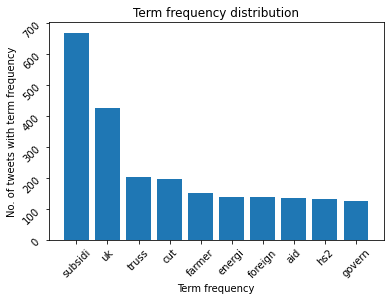

In [31]:
y = [count for tag, count in termFreqCounter.most_common(10)]
x = [tag for tag, count in termFreqCounter.most_common(10)]

plt.bar(x, y)
plt.tick_params(labelrotation=45)

plt.title("Term frequency distribution")
plt.ylabel('No. of tweets with term frequency')
plt.xlabel('Term frequency')
plt.show()

In [32]:
for term, count in termFreqCounter.most_common(100):
    print(term + ': ' + str(count))

subsidi: 669
uk: 425
truss: 204
cut: 197
farmer: 150
energi: 138
foreign: 138
aid: 135
hs2: 133
govern: 126
get: 123
spend: 119
tax: 114
longer: 105
environ: 94
“: 92
wast: 90
regim: 89
”: 88
form: 88
secretari: 88
mass: 87
divers: 87
hotel: 87
migrant: 87
farc: 87
say: 86
£: 85
told: 83
fund: 75
fuel: 70
make: 68
power: 67
hunt: 66
green: 63
plan: 63
stop: 61
fossil: 61
billion: 59
new: 59
compani: 59
farm: 53
need: 53
end: 53
scrap: 50
public: 50
rais: 49
support: 48
pound: 48
solar: 48
cancel: 47
project: 47
money: 47
sub: 46
difficult: 45
slash: 45
necessari: 45
vaniti: 45
market: 45
sign: 43
year: 43
limit: 42
good: 42
usa: 41
die: 41
back: 39
landen: 39
großen: 39
exportiert: 39
hier: 39
🪵: 39
werden: 39
kraftwerken: 39
um: 39
aus: 39
im: 39
europa: 39
den: 39
nach: 39
stil: 39
passiert: 39
zu: 39
🏭: 39
target: 35
eu: 35
bln: 34
pay: 34
drax: 34
renew: 34
work: 34
onli: 33
...: 33
go: 33
financ: 32
liz: 32
‘: 32
whi: 32
even: 32
would: 31
receiv: 31


In [33]:
def change_words(counter, dic, from_word, to_word):
    counter[to_word] = termFreqCounter[from_word]
    del counter[from_word]
    for tweet_id in dic:
        dic[tweet_id] = { 'time': dic[tweet_id]['time'] , 'tokens': list(map(lambda x: x.replace(from_word, to_word), dic[tweet_id]['tokens']))}


In [34]:
change_words(termFreqCounter, token_dic, "subsidi", "subsidy")
change_words(termFreqCounter, token_dic, "energi", "energy")
change_words(termFreqCounter, token_dic, "govern", "government")
change_words(termFreqCounter, token_dic, "environ", "environment")
change_words(termFreqCounter, token_dic, "wast", "waste")
change_words(termFreqCounter, token_dic, "regim", "regime")
change_words(termFreqCounter, token_dic, "secretari", "secretary")
change_words(termFreqCounter, token_dic, "compani", "company")
change_words(termFreqCounter, token_dic, "scrap", "scrape")
change_words(termFreqCounter, token_dic, "necessari", "necessary")
change_words(termFreqCounter, token_dic, "vaniti", "vanity")
change_words(termFreqCounter, token_dic, "europa", "europe")
change_words(termFreqCounter, token_dic, "onli", "only")
change_words(termFreqCounter, token_dic, "financ", "finance")
change_words(termFreqCounter, token_dic, "whi", "white")
change_words(termFreqCounter, token_dic, "receiv", "receive")



In [35]:
token_dic['1582280577352228864']['time']

Timestamp('2022-10-18 08:01:01+0000', tz='UTC')

In [36]:
for term, count in termFreqCounter.most_common(100):
    print(term + ': ' + str(count))

subsidy: 669
uk: 425
truss: 204
cut: 197
farmer: 150
foreign: 138
energy: 138
aid: 135
hs2: 133
government: 126
get: 123
spend: 119
tax: 114
longer: 105
environment: 94
“: 92
waste: 90
regime: 89
”: 88
form: 88
secretary: 88
mass: 87
divers: 87
hotel: 87
migrant: 87
farc: 87
say: 86
£: 85
told: 83
fund: 75
fuel: 70
make: 68
power: 67
hunt: 66
green: 63
plan: 63
stop: 61
fossil: 61
billion: 59
new: 59
company: 59
farm: 53
need: 53
end: 53
public: 50
scrape: 50
rais: 49
support: 48
pound: 48
solar: 48
cancel: 47
project: 47
money: 47
sub: 46
difficult: 45
slash: 45
market: 45
necessary: 45
vanity: 45
sign: 43
year: 43
limit: 42
good: 42
usa: 41
die: 41
back: 39
landen: 39
großen: 39
exportiert: 39
hier: 39
🪵: 39
werden: 39
kraftwerken: 39
um: 39
aus: 39
im: 39
den: 39
nach: 39
stil: 39
passiert: 39
zu: 39
🏭: 39
europe: 39
target: 35
eu: 35
bln: 34
pay: 34
drax: 34
renew: 34
work: 34
...: 33
go: 33
only: 33
liz: 32
‘: 32
white: 32
even: 32
finance: 32
would: 31
million: 31


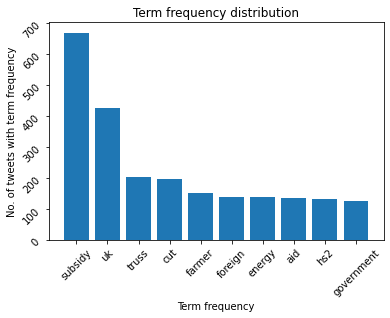

In [37]:
y = [count for tag, count in termFreqCounter.most_common(10)]
x = [tag for tag, count in termFreqCounter.most_common(10)]

plt.bar(x, y)
plt.tick_params(labelrotation=45)

plt.title("Term frequency distribution")
plt.ylabel('No. of tweets with term frequency')
plt.xlabel('Term frequency')
plt.show()

# Sentiment Analysis


In [38]:
import codecs

posWordFile = 'positive-words.txt'
negWordFile = 'negative-words.txt'

# loading the positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)


# load set of negative words
lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)


In [39]:
def vaderSentimentAnalysis():
    
    sentAnalyser = SentimentIntensityAnalyzer()

    lSentiment = []
    for tweet_id in token_dic:
        try:
            date = token_dic[tweet_id]['time']
            lTokens = token_dic[tweet_id]['tokens']

            dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
            lSentiment.append([pd.to_datetime(date), dSentimentScores['compound']])

            
            print(*lTokens, sep=', ')
            for cat,score in dSentimentScores.items():
                print('{0}: {1}, '.format(cat, score), end='')
            print()

        except KeyError as e:
            pass


    return lSentiment

In [40]:
token_dic

{'1582280577352228864': {'time': Timestamp('2022-10-18 08:01:01+0000', tz='UTC'),
  'tokens': ['basic',
   '…',
   'scotland',
   'england',
   'remind',
   'only',
   'ni',
   'wale',
   'uk',
   'function',
   'ba',
   'financei',
   'part']},
 '1582277675044900864': {'time': Timestamp('2022-10-18 07:49:29+0000', tz='UTC'),
  'tokens': ['ruto',
   'per',
   'think',
   'share',
   '..',
   'realli',
   'fuel',
   "i'm",
   'billion',
   'outsid',
   'month',
   'rao',
   'prone',
   'cancel',
   'uhuru',
   'uk',
   'hand',
   'would',
   'box',
   'friend',
   'wsr',
   'anyway',
   'shaken',
   'make',
   'subsidy',
   'podium']},
 '1582270509332717568': {'time': Timestamp('2022-10-18 07:21:01+0000', tz='UTC'),
  'tokens': ['gov',
   'rather',
   'invest',
   'endless',
   'piggy-bank',
   'strateg',
   'tax-pay',
   'uk',
   'equiti',
   'industri',
   'otherwis',
   'support',
   'fail',
   'subsidy']},
 '1582270240221601792': {'time': Timestamp('2022-10-18 07:19:57+0000', tz='UT

In [41]:
def countWordSentimentAnalysis():
   
    lSentiment = []
    for tweet_id in token_dic:
            date = token_dic[tweet_id]['time']
            lTokens = token_dic[tweet_id]['tokens']

            posNum = len([tok for tok in lTokens if tok in setPosWords])

            negNum = len([tok for tok in lTokens if tok in setNegWords])
            sentiment = posNum - negNum

            lSentiment.append([pd.to_datetime(date), sentiment])


            for token in lTokens:
                if token in setPosWords:
                    print(Fore.RED + token + ', ', end='')
                elif token in setNegWords:
                    print(Fore.BLUE + token + ', ', end='')
                else:
                    print(Style.RESET_ALL + token + ', ', end='')

            print(': {}'.format(sentiment))


    return lSentiment


In [42]:
from colorama import Fore, Back, Style

def centiment_graph(frequency, sentiment_type, lSentiment):
    series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
    
    series.set_index('date', inplace=True)
    
    series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)
    if( frequency == "daily" ):
        newSeries = series.resample('1D').sum()
    else:
        newSeries = series.resample('1H').sum()
    newSeries.plot()
    plt.title(sentiment_type + " " + frequency + " sentiment analysis")
    plt.show()

In [43]:
count_lSentiment = countWordSentimentAnalysis()

basic, …, scotland, england, remind, only, ni, wale, uk, function, ba, financei, part, : 0
ruto, per, think, share, .., realli, fuel, i'm, billion, outsid, month, rao, prone, cancel, uhuru, uk, hand, would, box, friend, wsr, anyway, shaken, make, subsidy, podium, : 0
gov, rather, invest, endless, piggy-bank, strateg, tax-pay, uk, equiti, industri, otherwis, support, fail, subsidy, : 0
price, recoveri, hous, might, full, worth, publish, reject, sign, enabl, rais, still, cost, quit, like, ban, mps, subsidy, follow, cater, petit, meal, common, servic, : 1
line, pound, set, independ, sturgeon, ani, scotland, blame, still, polici, rule, uk, limbo, boe, help, subsidy, presid, use, failur, run, economi, : -1
…, government, standard, energy, uk, scrape, provid, advic, target, imf, support, subsidy, follow, : 1
basic, …, scotland, england, remind, only, ni, wale, uk, function, ba, financei, part, : 0
basic, …, scotland, england, remind, only, ni, wale, uk, function, ba, financei, part, : 0
…, g

pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
limit, billion, subsidy, power, rais, tax, say, hunt, £, : -1
end, …, instead, household, energy, april, current, p, subsidy, bill, year, two, run, : 0
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
limit, pound, subsidy, uk, rais, tax, say, hunt, power, bln, : -1
end, …, instead, household, energy, april, current, p, subsidy, bill, year, two, run, : 0
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
end, …, instead, household, energy, april, current, p, subsidy, bill, year, two, run, : 0
billion, only, : 0
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln, : -1
limit, pound, subsidy, uk, rais, tax, reuter, say, hunt

transmiss, land, firmer, …, ”, cheaper, only, “, sunni, subsidy, windi, spend, : 2
pollut, sinc, …, government, fuel, fossil, billion, £, paid, uk, accord, tax, given, p, subsidy, company, : 0
pollut, sinc, …, government, fuel, fossil, billion, £, paid, uk, accord, tax, given, p, subsidy, company, : 0
💻, decemb, per, 🛋, academ, school, join, 🤩, assess, 🏻, 🎟, 2nd, state-fund, £, book, info, 👉, remot, ℹ️, 9.30, subsidy, ⏰, year, 🤗, 🗓, : 0
pollut, sinc, …, government, fuel, fossil, billion, £, paid, uk, accord, tax, given, p, subsidy, company, : 0
pollut, sinc, …, government, fuel, fossil, billion, £, paid, uk, accord, tax, given, p, subsidy, company, : 0
transmiss, land, firmer, …, ”, cheaper, only, “, sunni, subsidy, windi, spend, : 2
sinc, first, return, increas, main, servicemen, go, bit, becom, save, job, countri, export, uk, get, frame, 3rd, implement, world, subsidy, time, nz, ww2, economi, : 0
demand, could, continu, altern, chain, food, instead, plant-bas, intent, decent, busi, y

mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
million, …, clean, government, green, £, current, direct, uk, drax, day, receive, subsidy, alway, : 1
pellet, gloster, million, majority-black, government, clean, communiti, expos, mill, situat, green, disproportion, £, next, direct, current, uk, drax, day, receive, subsidy, bastrop, alway, : 1
per, million, govt, government, energy, green, £, gave, uk, fund, last, drax, day, reveal, scam, subsidy, biggest, year, credenti, company, investig, stop, ‘, : -1
connect, land, tell, white, grid, yield, government, shown, increas, instal, crop, solar, polici, conserv, proper, uk, would, also, farmer, abl, prevent, subsidy, farm, : 1
miriam, shift, government, altern, join, urg, plant-bas, sign, dairi, uk, industri, margoly, fund, subsidy, petit, : 0
subsidy, explor, level, avail, physic, 🎓, mathema, work, …, mathemat, collabor, : 1
brief, freeport, …, ”, offer, current, cite, export, “, uk, benefit

bust, untarget, altern, becaus, go, see, asid, energy, busi, polici, instabl, quit, uk, like, social, anyth, market, natur, subsidy, univers, : 0
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
per, million, government, gov, energy, green, £, gave, uk, fund, last, drax, day, reveal, scam, subsidy, biggest, year, credenti, company, investig, stop, ‘, : -1
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend, : -1
mass, divers

ecosystem, …, communiti, go, good, green, £, destroy, 2m, uk, day, receive, subsidy, work, : 1
mullah, uk, subsidy, government, : 0
success, china, …, enorm, state, ev, larg, consum, market, subsidy, part, manufactur, : 1
demand, made, …, go, energy, 1/2, uk, focus, market, gilt, inelast, stori, real, even, : 0
success, china, …, enorm, state, ev, larg, consum, market, subsidy, part, manufactur, : 1
window, success, china, blind, chose, enorm, state, close, ev, larg, consum, uk, compet, market, turn, fear, soon, subsidy, part, opportun, eye, manufactur, : -1
highest, public, white, government, forc, .., unfortun, becaus, energy, absorb, europ, henc, tori, therefor, cost, subject, market, abl, pay, subsidy, european, sold, : 0
fast, boom, sale, could, car, end, cheap, sell, china, last, market, electr, subsidy, : 1
success, …, govt, cut, home, conservative-l, improv, support, onward, : 2
object, claim, either, issu, .., hoc, canteen, go, way, expens, london, hospit, ni, would, also, nur

…, environment, told, truss, longer, secretary, get, farmer, form, subsidy, : 0
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy, : 0
cheap, white, …, oh, subsidys, cheapest, solar, let, power, away, subsidy, form, take, : 0
cheap, white, oh, subsidys, commerci, becaus, cheapest, panel, can't, solar, lie, uk, let, power, without, oper, away, subsidy, form, take, singl, : -1
cheap, white, oh, subsidys, commerci, becaus, cheapest, panel, can't, solar, lie, uk, let, power, without, oper, away, subsidy, form, take, singl, : -1
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy, : 0
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy, : 0
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy, : 0
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy, : 0
subsidy, protection, government, action, : 1
demand, land, white, government, might, intervent, see, solar, cfd, let, best, m

In [44]:
count_lSentiment

[[Timestamp('2022-10-18 08:01:01+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 07:49:29+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 07:21:01+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 07:19:57+0000', tz='UTC'), 1],
 [Timestamp('2022-10-18 06:56:01+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 06:44:10+0000', tz='UTC'), 1],
 [Timestamp('2022-10-18 06:36:26+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 06:35:03+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 06:34:45+0000', tz='UTC'), 1],
 [Timestamp('2022-10-18 06:32:40+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 06:28:51+0000', tz='UTC'), 1],
 [Timestamp('2022-10-18 06:09:33+0000', tz='UTC'), 1],
 [Timestamp('2022-10-18 05:25:40+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 04:45:01+0000', tz='UTC'), -1],
 [Timestamp('2022-10-18 04:05:00+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 03:48:42+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 00:49:19+0000', tz='UTC'), 0],
 [Timestamp('2022-10-18 00:39:06+0000', tz='UTC'), 0],
 [Times

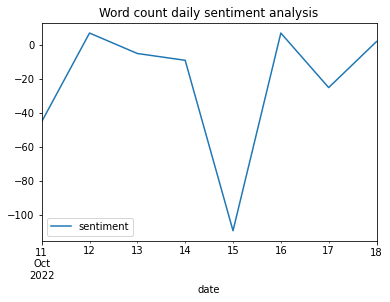

In [45]:
centiment_graph("daily", "Word count", count_lSentiment)

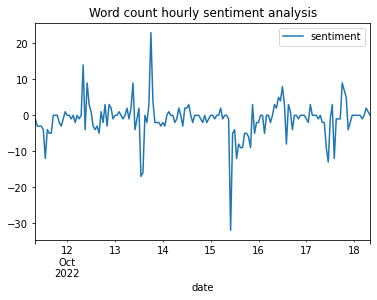

In [46]:
centiment_graph("hourly", "Word count", count_lSentiment)

In [47]:
vader_lSentiment = vaderSentimentAnalysis()

basic, …, scotland, england, remind, only, ni, wale, uk, function, ba, financei, part
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ruto, per, think, share, .., realli, fuel, i'm, billion, outsid, month, rao, prone, cancel, uhuru, uk, hand, would, box, friend, wsr, anyway, shaken, make, subsidy, podium
neg: 0.1, neu: 0.638, pos: 0.261, compound: 0.743, 
gov, rather, invest, endless, piggy-bank, strateg, tax-pay, uk, equiti, industri, otherwis, support, fail, subsidy
neg: 0.192, neu: 0.659, pos: 0.148, compound: -0.2023, 
price, recoveri, hous, might, full, worth, publish, reject, sign, enabl, rais, still, cost, quit, like, ban, mps, subsidy, follow, cater, petit, meal, common, servic
neg: 0.205, neu: 0.651, pos: 0.143, compound: -0.4404, 
line, pound, set, independ, sturgeon, ani, scotland, blame, still, polici, rule, uk, limbo, boe, help, subsidy, presid, use, failur, run, economi
neg: 0.1, neu: 0.788, pos: 0.112, compound: 0.0772, 
…, government, standard, energy, uk, scrape, provid,

signific, programm, government, standard, household, typic, come, energy, busi, uk, scrape, provid, cost, inflat, advic, target, support, imf, poorest, subsidy, follow, stop, occur
neg: 0.193, neu: 0.644, pos: 0.163, compound: -0.2263, 
pound, 🔥, trade, limit, mc900, rais, 👉, uk, tax, app, power, subsidy, say, hunt, download, bln
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
print, …, orchestr, balk, uk, market, half, trillion
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pound, limit, rais, uk, tax, power, subsidy, say, hunt, bln
neg: 0.0, neu: 1.0, pos: 0.0, compound:

neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.2732, 
made, oil, trace, hole, frack, sever, green, £, tori, bomb, gas, corrupt, cost, ppe, uk, levi, minibudget, write-off, useless, huge, budget, fraud, remov, denier, 100bn, new, subsidy, test, permit, climat, use, grant, deal
neg: 0.285, neu: 0.603, pos: 0.111, compound: -0.8176, 
subsidy, debat, sign, end, parliament, …, petit, fun, fuel, fossil
neg: 0.0, neu: 0.708, pos: 0.292, compound: 0.5106, 
end, includ, …, pension, state, wealthi, means-test, need, last, subsidy, year
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
pound, bbc, first, …, billion, learn, 🌳, accord, six, receive, panorama, gr, firm, investig
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
end, …, zero, wind, home, solar, tori, carbon, insul, scrape, scheme, ban, fail, subsidy
neg: 0.392, neu: 0.608, pos: 0.0, compound: -0.7964, 
💻, decemb, per, 🛋, academ, school, join, 🤩, assess, 🏻, 🎟, 2nd, state-fund, £, book, info, 👉, remot, ℹ️, 9.30, subsidy, ⏰, year, 🤗, 🗓
neg: 0.0,

tell, government, communiti, cut, wood, sign, american, canda, endang, green, £, forest, 2m, uk, burn, drax, largest, subsidy, major, south, company, poor, petit, black, stop
neg: 0.261, neu: 0.739, pos: 0.0, compound: -0.7506, 
difficult, …, slash, cut, sub, hs2, aid, cancel, necessary, vanity, make, foreign, project, stop
neg: 0.646, neu: 0.354, pos: 0.0, compound: -0.8689, 
eu, finance, incred, ”, sustain, junki, known, milk, pastor, agri, innov, need, larg, produc, import, cartel-driven, “, uk, huge, also, plant, call, subsidy, ween, stifl
neg: 0.0, neu: 0.905, pos: 0.095, compound: 0.3182, 
exploit, kind, deutsch, investor, capit, qualiti, attract, state-own, taxpay, bahn, yet, erod, britain, excel, railway, chiltern, wrong, cash, cow, subsidy, simpli, often, servic
neg: 0.143, neu: 0.573, pos: 0.283, compound: 0.6597, 
manifesto, law, …, renewabl, net-zero, commit, parti, uk, scrape, major, ukip, pledg, climat
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
pollut, air, habit

sector, fuel, better, vast, fossil, distort, free, give, much, uk, would, market, subsidy, suppos
neg: 0.118, neu: 0.564, pos: 0.318, compound: 0.5994, 
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend
neg: 0.308, neu: 0.692, pos: 0.0, compound: -0.5994, 
sure, gover, …, roulett, need, uk, market, make, buy, new, financei, biodivers, villa, play
neg: 0.0, neu: 0.701, pos: 0.299, compound: 0.5719, 
factori, soni, built, whale, cma, protect, invest, to.vlock, uk, make, subsidy, tri, use, merger
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.3818, 
brexit, caught, govt, lie, assur, uk, would, dup, post, ditto, farmer, subsidy, match
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend
neg: 0.308, neu: 0.692, pos: 0.0, compound: -0.5994, 
keep, cut, 45b, rate, energy, £, differ, ni, would, labour, make, subsidy, major, say, 60b
neg: 0.13, neu: 0.741, pos: 0.13, compo

per, million, tell, end, ⬇, instead, energy, rip-off, green, £, uk, last, given, drax, day, fund, scam, subsidy, biggest, year, credenti, ️, real, crisi, company, ‘, solut
neg: 0.138, neu: 0.784, pos: 0.078, compound: -0.3818, 
demand, fossil, opposit, invest, energy, cheaper, communism, communist, tax, subsidy, project, time
neg: 0.11, neu: 0.735, pos: 0.154, compound: 0.1531, 
subsidy, pleas, sign, end, instal, fund, …, grant, fuel, fossil
neg: 0.0, neu: 0.762, pos: 0.238, compound: 0.3612, 
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend
neg: 0.308, neu: 0.692, pos: 0.0, compound: -0.5994, 
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend
neg: 0.308, neu: 0.692, pos: 0.0, compound: -0.5994, 
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regime, waste, foreign, spend
neg: 0.308, neu: 0.692, pos: 0.0, compound: -0.5994, 
mass, divers, hotel, …, cut, migrant, hs2, farc, aid, truss, regim

neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5859, 
kid, perk, plummet, 10,000, depart, car, ..., patrol, rent, sign, exclus, take-hom, offer, cop, scholarship, applic, polic, want, bonus, subsidy, even
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5859, 
kid, perk, plummet, 10,000, depart, car, ..., patrol, rent, sign, exclus, take-hom, offer, cop, scholarship, applic, polic, want, bonus, subsidy, even
neg: 0.0, neu: 0.798, pos: 0.202, compound: 0.5859, 
subsidy, pleas, sign, end, instal, fund, …, grant, fuel, fossil
neg: 0.0, neu: 0.762, pos: 0.238, compound: 0.3612, 
exclud, oil, amount, ordinari, anoth, learn, total, revenu, 47.4, green, £, 11.1, paid, gas, uk, corpor, tax, last, profit, bn, pay, read, subsidy, year, 51.4, company, add, compar
neg: 0.048, neu: 0.853, pos: 0.099, compound: 0.3612, 
end, …, increas, fuel, fossil, panel, homeown, sign, instal, solar, pleas, fund, subsidy, petit, grant
neg: 0.0, neu: 0.839, pos: 0.161, compound: 0.3612, 
…, victim, back, sit, farmer, 

neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.5994, 
fast, boom, sale, could, car, end, cheap, sell, china, last, market, electr, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
old, finance, million, transit, billion, energy, bc, green, need, forest, 🤷, uk, log, burn, 9.2, receive, growth, away, subsidy, seem, money, find, say, c, ‘
neg: 0.0, neu: 0.81, pos: 0.19, compound: 0.5719, 
…, massiv, empti, want, train, b, pay, subsidy, near, lot, run, timet
neg: 0.131, neu: 0.748, pos: 0.121, compound: -0.0258, 
demand, livestock, possibl, utilis, rather, better, food, simpli, put, integr, crop, solar, next, build, much, provid, check, chang, leap, fashion, make, subsidy, logic, farmland, sens, particulalri
neg: 0.053, neu: 0.845, pos: 0.102, compound: 0.34, 
rip, …, cook, grovel, canadian, uk, rainforest, aliv, drax, subsidy, planet, whitete, eleph
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
landen, großen, …, exportiert, hier, 🪵, werden, die, kraftwerken, um, aus, usa, im, europe

neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
…, environment, told, truss, longer, secretary, get, farmer, form, subsidy
neg: 0.0, neu: 1.0, pos: 0.0, co

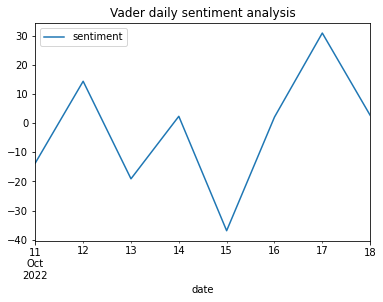

In [48]:
centiment_graph("daily","Vader", vader_lSentiment)

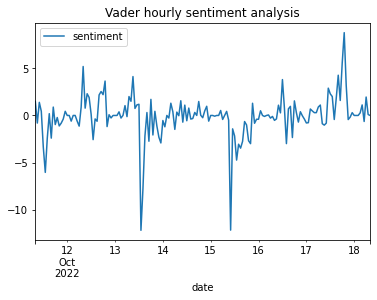

In [49]:
centiment_graph("hourly","Vader", vader_lSentiment)

In [50]:
def getAverageSentiment(sentiment):
    sum = 0
    for snt in sentiment:
        sum+=snt[1]
    print(sum/len(sentiment))

In [51]:
getAverageSentiment(count_lSentiment)

-0.1713455953533398


In [52]:
getAverageSentiment(vader_lSentiment)

-0.016139787028073508


In [53]:
len(count_lSentiment)

1033

In [54]:
len(tweets_df)

1033

In [55]:
def return_sentiment(x):
    if x > 0:
        return "positive"
    elif x < 0:
        return "negative"
    return "neutral"

tweets_df['sentiment_score_count'] = [score[1] for score in count_lSentiment]
tweets_df['sentiment_count'] = tweets_df['sentiment_score_count'].apply(return_sentiment)
tweets_df['sentiment_score_vader'] = [score[1] for score in vader_lSentiment]
tweets_df['sentiment_vader'] = tweets_df['sentiment_score_vader'].apply(return_sentiment)

In [56]:
tweets_df['sentiment_count'].value_counts()

neutral     420
negative    391
positive    222
Name: sentiment_count, dtype: int64

In [57]:
tweets_df['sentiment_vader'].value_counts()

positive    395
negative    365
neutral     273
Name: sentiment_vader, dtype: int64

# LDA Model

In [58]:
lTweets = []

for tweet_id in token_dic:
    date = token_dic[tweet_id]['time']
    lTokens = token_dic[tweet_id]['tokens']
    lTweets.append(' '.join(lTokens))

In [59]:
topicNum = 3
wordNumToDisplay = 10
featureNum = 100

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lTweets)

tfFeatureNames = tfVectorizer.get_feature_names()

ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [61]:
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [62]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
subsidy farmer longer environment secretary form truss told fund make
Topic 1:
subsidy uk tax energy government say power green company billion
Topic 2:
cut spend truss foreign waste aid regime hs2 hotel migrant


In [63]:
import pyLDAvis.sklearn

panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/opt/anaconda3/lib/python3.8/site-packages/sklearn

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


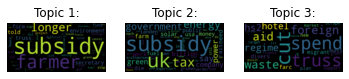

In [64]:
import numpy as np
import math
from wordcloud import WordCloud

def displayWordcloud(model, featureNames):

    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    topicNum = len(model.components_)
    plotColNum = 3
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)
displayWordcloud(ldaModel, tfFeatureNames)

In [65]:
import networkx as nx

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
energyGraph = nx.Graph()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
tweets_df.columns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['id', 'text', 'time', 'hastags', 'mentions', 'language',
       'retweet count', 'like_count', 'country', 'author_id', 'username',
       'year', 'month', 'day', 'hour', 'sentiment_score_count',
       'sentiment_count', 'sentiment_score_vader', 'sentiment_vader'],
      dtype='object')

In [68]:
pos_data = tweets_df[tweets_df['sentiment_count'] ==  'positive'][['username', 'sentiment_score_count', 'author_id', 'retweet count', 'id']]
pos_data.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,sentiment_score_count,author_id,retweet count,id
3,ficrosbie63,1,1223328351273848833,0,1582270240221601792
5,Hygatabac,1,1176565286406955009,24,1582261238591262720
8,anil_yv,1,3256285948,24,1582258866943045632
10,lukedgraham,1,1336206974,24,1582257382625005569
11,Herbivore27,1,1002216548617072649,1,1582252527273537536


In [69]:
neg_data = tweets_df[tweets_df['sentiment_count'] ==  'negative'][['username', 'sentiment_score_count', 'author_id', 'retweet count', 'id']]
neg_data.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,sentiment_score_count,author_id,retweet count,id
4,ItHappensAtTea,-1,764083678737817600,0,1582264219537641472
9,edglasgow59,-1,255223525,3,1582258341463863296
13,DonaldOHalloran,-1,436211393,0,1582231252396281856
19,atoply_tax,-1,1319278235826282498,0,1582142423228379137
20,atoply_tax,-1,1319278235826282498,0,1582139902460055553


In [70]:
neg_data = neg_data[neg_data['retweet count'] != 0]
neg_data.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(275, 5)

In [71]:
neg_data = neg_data.head(1000)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
neg_data['retweet count'].sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14406

In [73]:
len(neg_data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


275

In [78]:
for i in neg_data.itertuples():
    energyGraph.add_node(i[1], score = i[2], retweets = i[4])
    for j in range(i[4]):
        energyGraph.add_node(f'{i[5]}_{j}', nature = 'neg')
        energyGraph.add_edge(i[2], f'{i[5]}_{j}')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
len(energyGraph.nodes())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14680

In [80]:
with open('Graphs/SubsidiesPolicyNeg.graphml', 'wb') as fOut:
    nx.write_graphml(energyGraph, fOut)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
energyGraph.clear()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
pos_data = pos_data[pos_data['retweet count'] != 0]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
pos_data.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(145, 5)

In [85]:
pos_data['retweet count'].sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3029

In [86]:
len(pos_data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


145

In [87]:
for i in pos_data.itertuples():
    energyGraph.add_node(i[1], score = i[2], retweets = i[4])
    for j in range(i[4]):
        energyGraph.add_node(f'{i[5]}_{j}', nature = 'pos')
        energyGraph.add_edge(i[2], f'{i[5]}_{j}')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
len(energyGraph.nodes())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3176

In [89]:
with open('Graphs/SubsidiesPolicyPos.graphml', 'wb') as fOut:
    nx.write_graphml(energyGraph, fOut)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
